In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('UserBehavior.csv',header=None)
df


,0,1,2,3,4
0,1,2268318,2520377,pv,1511544070
1,1,2333346,2520771,pv,1511561733
2,1,2576651,149192,pv,1511572885
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146
...,...,...,...,...,...
100150802,999999,4797808,11120,pv,1512293403
100150803,999999,4613472,4602841,pv,1512293766
100150804,999999,3647364,2304296,pv,1512293792
100150805,999999,1903801,2304296,pv,1512293827


In [2]:
col_names = ['UserID','ItemID','CategoryID','BehaviorType','Time Stamps']
df.columns = col_names

In [3]:
df.isnull().sum()

UserID          0
ItemID          0
CategoryID      0
BehaviorType    0
Time Stamps     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   UserID        int64 
 1   ItemID        int64 
 2   CategoryID    int64 
 3   BehaviorType  object
 4   Time Stamps   int64 
dtypes: int64(4), object(1)
memory usage: 3.7+ GB


In [6]:
print(len(df))
print(len(df['UserID'].unique()))
print(len(df['ItemID'].unique()))
print(len(df['CategoryID'].unique()))

100150807
987994
4162024
9439


In [9]:
import datetime
import time
from datetime import datetime, timedelta
start =int( time.mktime( time.strptime( "2017-11-25 00:00:00", "%Y-%m-%d %H:%M:%S")))
end=int( time.mktime( time.strptime("2017-11-27 23:59:59", "%Y-%m-%d %H:%M:%S")))
df = df.loc[(df['Time Stamps'] >= start) & (df['Time Stamps'] <= end)]

In [11]:
df

,UserID,ItemID,CategoryID,BehaviorType,Time Stamps
3,1,3830808,4181361,pv,1511593493
4,1,4365585,2520377,pv,1511596146
5,1,4606018,2735466,pv,1511616481
6,1,230380,411153,pv,1511644942
7,1,3827899,2920476,pv,1511713473
...,...,...,...,...,...
100150517,999990,4000521,2735466,pv,1511822900
100150518,999990,3126539,4606718,pv,1511822940
100150519,999990,4652136,4069500,pv,1511823048
100150755,999999,1492928,4794845,pv,1511604118


In [12]:
df.describe(include=object)

,BehaviorType
count,31080480
unique,4
top,pv
freq,27859235


In [14]:
BehaviorType_counts = df["BehaviorType"].value_counts().rename_axis('BehaviorType').reset_index(name='counts')
BehaviorType_counts

,BehaviorType,counts
0,pv,27859235
1,cart,1681723
2,fav,900951
3,buy,638571


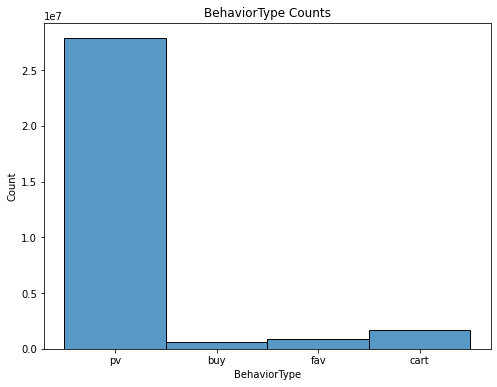

In [16]:
fig = plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="BehaviorType");
plt.title('BehaviorType Counts');

In [18]:
df[['UserID']].drop_duplicates(inplace=False)

,UserID
3,1
73,100
164,1000
234,1000001
275,1000004
...,...
100150096,999988
100150154,999989
100150312,99999
100150454,999990


In [20]:
print(len(df))
print(len(df.UserID.unique()))
print(len(df.ItemID.unique()))
print(len(df.CategoryID.unique()))

31080480
929119
2648125
8825


In [37]:
datetime_lst = []
date_lst = []
for i in df['Time Stamps']:
    datetime_lst.append(datetime.fromtimestamp(i).strftime("%c"))
    date_lst.append(datetime.fromtimestamp(i).strftime("%x"))
df['time'] = datetime_lst

<ipython-input-37-6f42732e8340>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = datetime_lst


In [41]:
df['date'] = date_lst

<ipython-input-41-27832ef6997e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = date_lst


In [43]:
df['hour'] = df['time'].str[11:13].astype(int)

<ipython-input-43-7264f43a0e2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['time'].str[11:13].astype(int)


In [46]:
df.head()

,UserID,ItemID,CategoryID,BehaviorType,Time Stamps,time,date,hour
2,1,3830808,4181361,pv,1511593493,2017-11-25 02:04:53,2017-11-25,2
3,1,4365585,2520377,pv,1511596146,2017-11-25 02:49:06,2017-11-25,2
4,1,4606018,2735466,pv,1511616481,2017-11-25 08:28:01,2017-11-25,8
5,1,230380,411153,pv,1511644942,2017-11-25 16:22:22,2017-11-25,16
6,1,3827899,2920476,pv,1511713473,2017-11-26 11:24:33,2017-11-26,11


In [8]:
df.sort_values(by='Time Stamps', ascending=True, inplace=True)

In [9]:
df.reset_index(drop=True, inplace=True)

In [15]:
df

,UserID,ItemID,CategoryID,BehaviorType,Time Stamps,time,date,hour
0,333972,2177368,3514742,pv,1511586000,2017-11-25 00:00:00,2017-11-25,0
1,572022,1720811,2106073,cart,1511586000,2017-11-25 00:00:00,2017-11-25,0
2,969957,3580994,1216617,pv,1511586000,2017-11-25 00:00:00,2017-11-25,0
3,346064,137573,2920476,pv,1511586000,2017-11-25 00:00:00,2017-11-25,0
4,271724,1371143,1595193,pv,1511586000,2017-11-25 00:00:00,2017-11-25,0
...,...,...,...,...,...,...,...,...
31080475,53713,3544174,1299190,pv,1511845199,2017-11-27 23:59:59,2017-11-27,23
31080476,79987,3051471,3898483,pv,1511845199,2017-11-27 23:59:59,2017-11-27,23
31080477,218788,1509715,4801426,pv,1511845199,2017-11-27 23:59:59,2017-11-27,23
31080478,136564,1890109,2355072,pv,1511845199,2017-11-27 23:59:59,2017-11-27,23


In [11]:
daily_behavior_counts = df.groupby(['date','BehaviorType']).size().reset_index()

In [12]:
daily_behavior_counts = daily_behavior_counts.rename(columns={0: 'counts'})

In [13]:
daily_behavior_counts

,date,BehaviorType,counts
0,2017-11-25,buy,201109
1,2017-11-25,cart,573806
2,2017-11-25,fav,309051
3,2017-11-25,pv,9514799
4,2017-11-26,buy,221756
5,2017-11-26,cart,568493
6,2017-11-26,fav,302432
7,2017-11-26,pv,9403950
8,2017-11-27,buy,215706
9,2017-11-27,cart,539424


In [14]:
daily_behavior_counts = daily_behavior_counts.pivot(index='date', columns='BehaviorType', values='counts')
daily_behavior_counts

BehaviorType,buy,cart,fav,pv
date,,,,
2017-11-25,201109,573806,309051,9514799
2017-11-26,221756,568493,302432,9403950
2017-11-27,215706,539424,289468,8940486


In [15]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.4.3


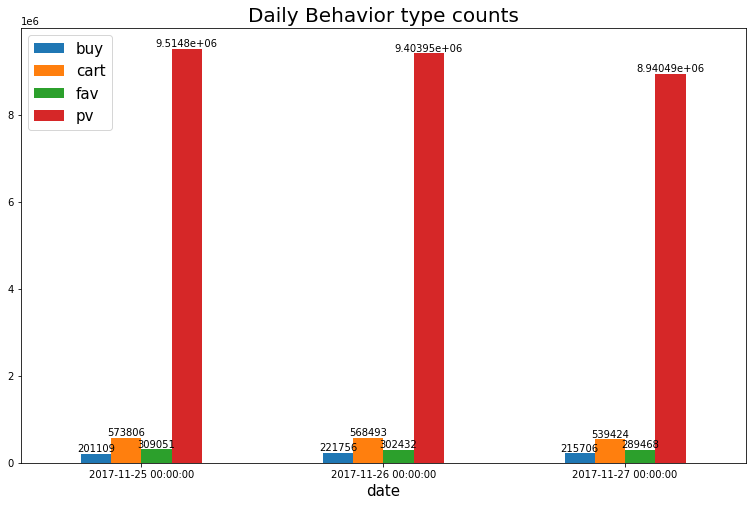

In [31]:
ax=daily_behavior_counts.plot.bar(rot=0,figsize=(13, 8));
plt.xticks(fontsize=10 ) 
plt.xlabel('date',fontsize=15)
plt.legend(fontsize=15)
plt.title('Daily Behavior type counts',fontsize= 20)
for container in ax.containers:
    ax.bar_label(container)